# Lab 1: Introductory Statistics

In [58]:
import pandas as pd
from plotnine import ggplot, aes, stat_qq, stat_qq_line, geom_boxplot, geom_density, coord_flip, geom_vline, geom_hline, geom_histogram, labs
import scipy.stats 
import statsmodels.api as sm
import numpy as np
import scipy
from scipy.stats import anderson, shapiro

## Question Set 1
Using the normtemp dataset(https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/normtemp.csv), answer the following questions

In [38]:
normtemp = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/normtemp.csv", sep=r'\s+')

### Question 1a
What is the mean of the temperature variable? (round to 2 decimal places)

In [39]:
mean = normtemp['temperature'].mean()
mean

np.float64(98.24923076923078)

##$ Question 1b
What is the minimum of the temperature variable? 

In [14]:
min_temp = normtemp['temperature'].min()
min_temp

96.3

### Question 1c
What is the maximum of the temperature variable?

In [15]:
max_temp = normtemp['temperature'].max()
max_temp

100.8

### Question 1d
What is the median of the temperature variable?

In [16]:
median_temp = normtemp['temperature'].median()
median_temp

98.3

### Question 1e
Create a QQ-plot for the temperature variable. Choose the correct plot below:

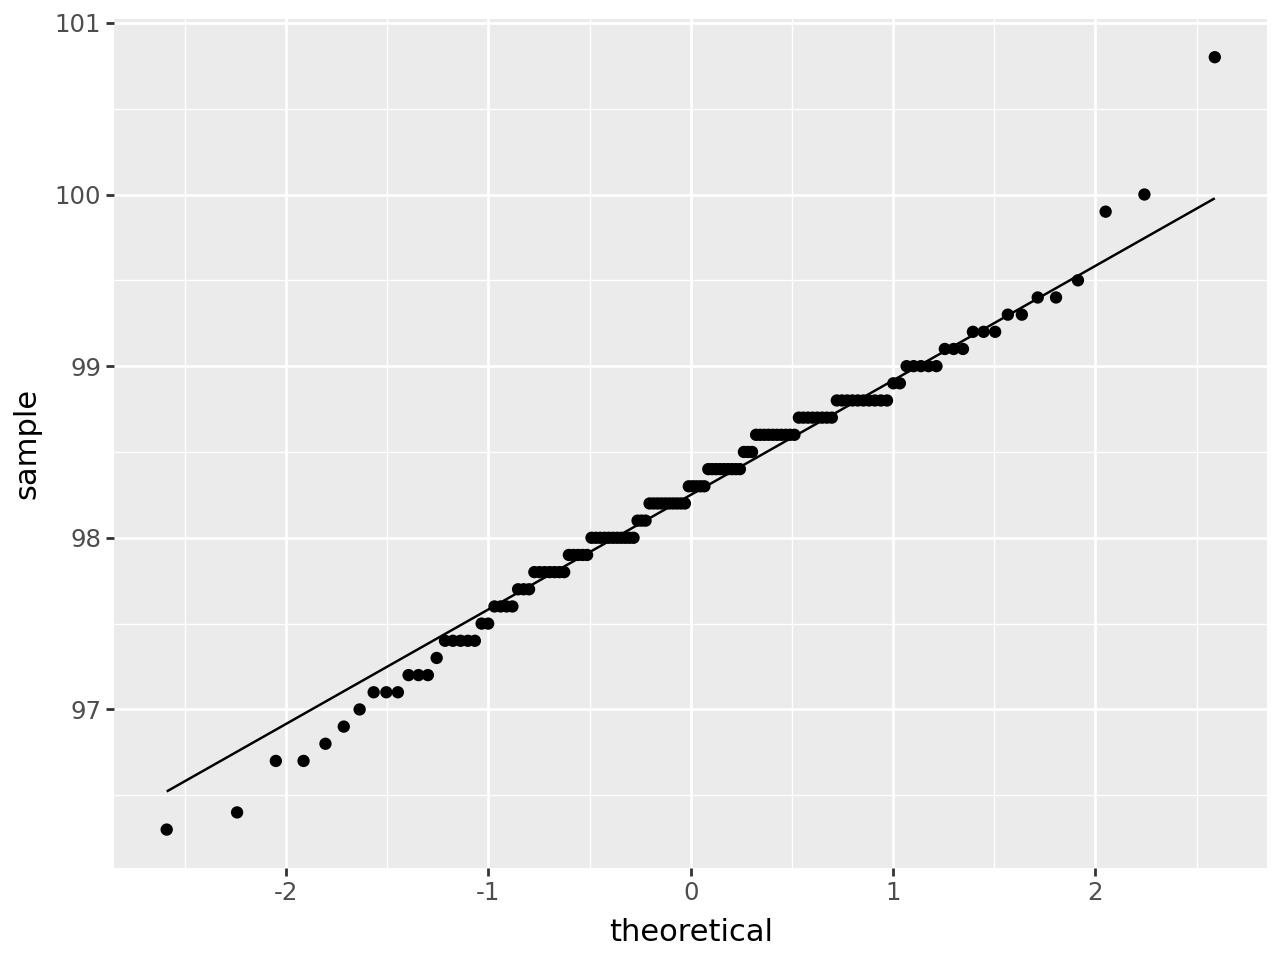

In [17]:
qq_plot = (ggplot(normtemp, aes(sample = 'temperature')) +
           stat_qq() +
           stat_qq_line())

qq_plot.show()

### Question 1f
Based on the qq-plot, does the data appear to be normal?

Answer: Yes, roughly, through to check we can run normality tests on the dataset

In [22]:
scipy.stats.shapiro(normtemp['temperature'])


ShapiroResult(statistic=np.float64(0.9865773248307249), pvalue=np.float64(0.23318609009418706))

In [ ]:
sm.stats.diagnostic.normal_ad(normtemp['temperature'])

(np.float64(0.5201038826714353), np.float64(0.1829246044435888))

### Question 1g
Create a boxplot for temperature with a reference line at 98.6 degrees. For a horizontal line: + geom_hline(yintercept = 98.6) For a vertical line: + geom_vline(xintercept = 98.6) 

Which plot below is the correct plot?

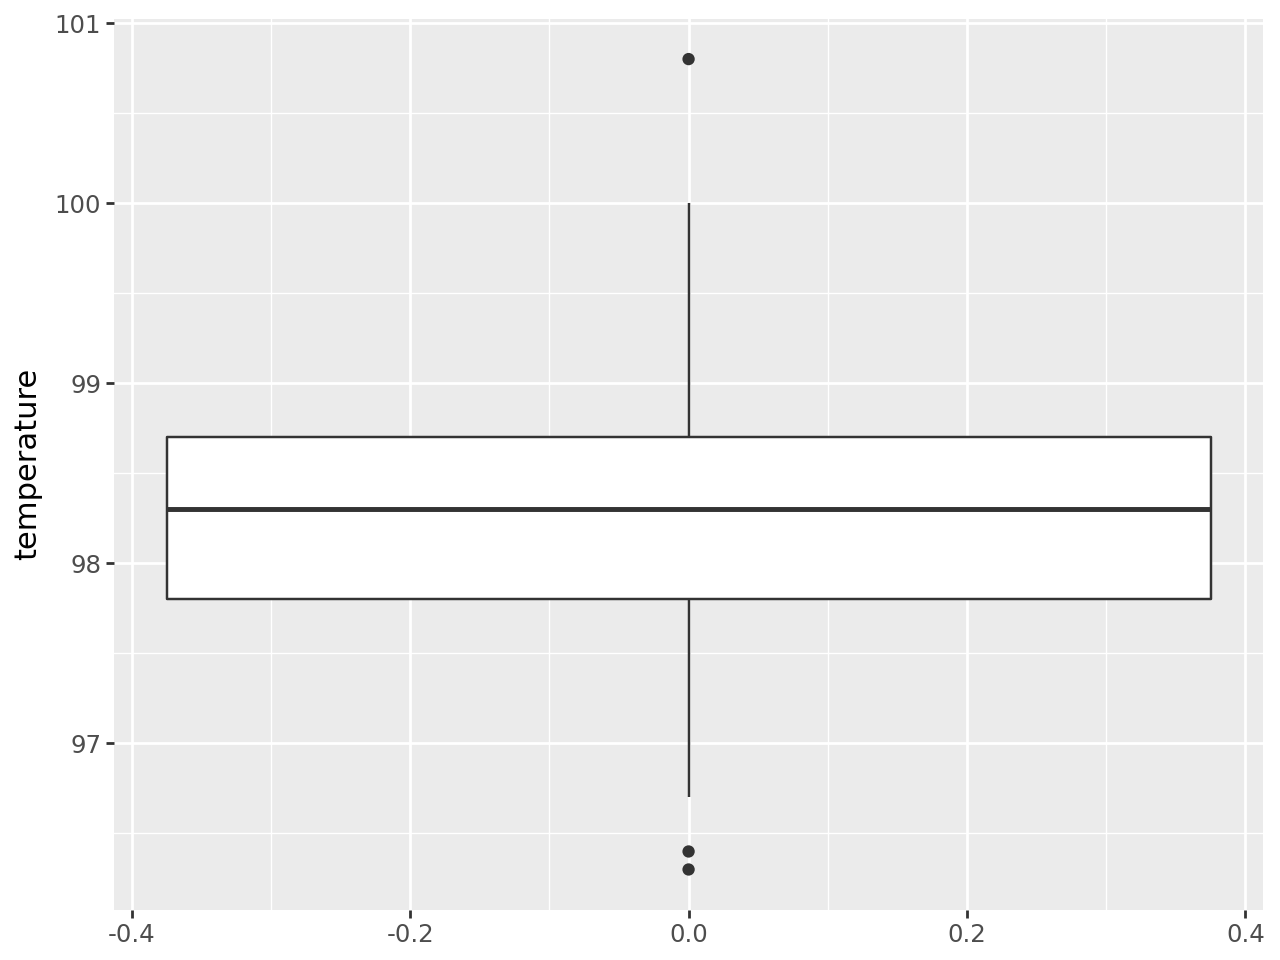

In [36]:
box_plot = (ggplot(normtemp, aes(y = 'temperature')) +
            geom_boxplot())

box_plot.show()

### Question 1h
Are there any outliers?

Answer: Yes

### Question 1i
Does the median body temperature seem to be 98.6 degrees?

Answer: No

## Question Set 2
Using the Ameshousing dataset to answer the following questions using the SalePrice, Gr Liv Area, and log(SalePrice) variables.

In [45]:
ames_housing = pd.read_csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/Ames.csv')

### Question 2a
Create a histogram of SalePrice. Which is the correct histogram?

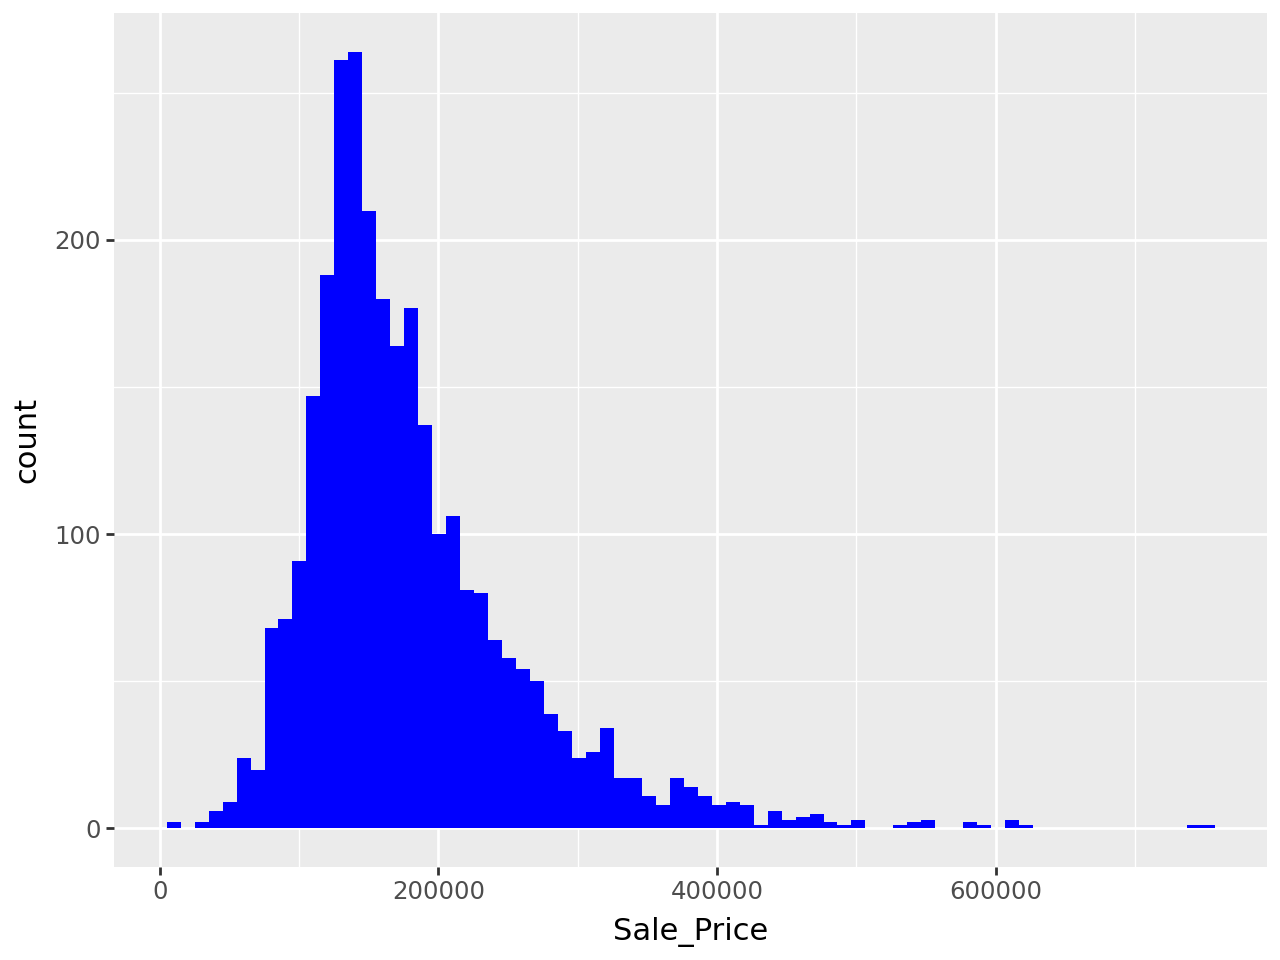

In [49]:
histogram = (ggplot(ames_housing, aes(x = 'Sale_Price')) +
             geom_histogram(fill = 'blue', bins = 75))

histogram.show()

### Question 2b
The distribution of the SalePrice variable is:

Answer: right skewed

### Question 2c
Make a histogram of Log(Sale_Price). Which is the correct histogram?

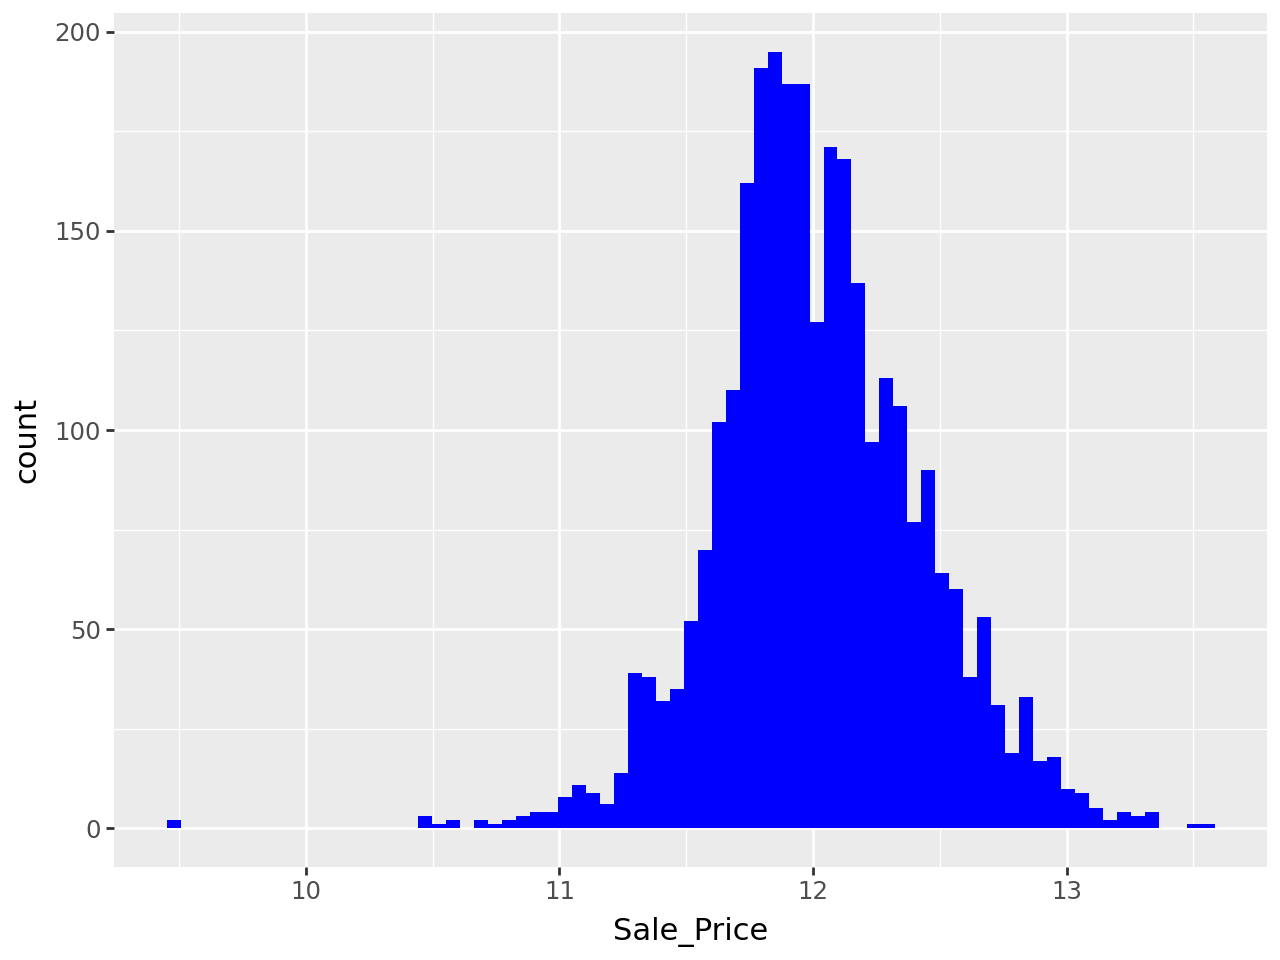

In [50]:
log_sale_price = np.log(ames_housing['Sale_Price'])

log_histogram = (ggplot(ames_housing, aes(x = log_sale_price)) +
                 geom_histogram(fill = 'blue', bins = 75))

log_histogram.show()

### Question 2d
The distribution of the log(SalePrice) variable is:

Answer: left skewed (according to the grading) but I am still confused about this.

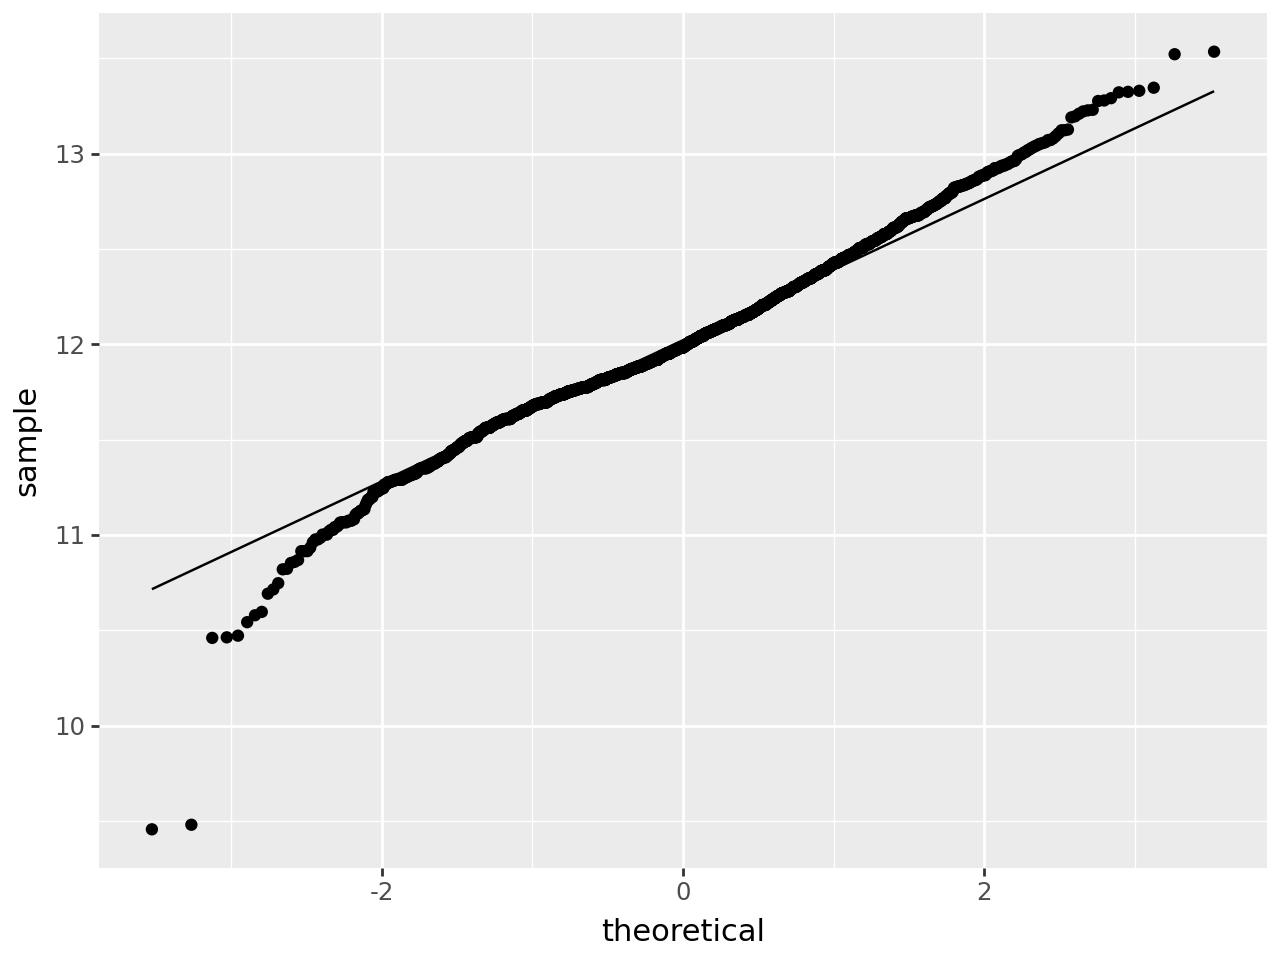

In [53]:
log_qq_plot = (ggplot(ames_housing, aes(sample = log_sale_price)) +
               stat_qq() +
                stat_qq_line())
log_qq_plot.show()

In [54]:
log_sale_price.describe()

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: Sale_Price, dtype: float64

In [55]:
log_sale_price.median()

11.982929094215963

In [51]:
scipy.stats.shapiro(log_sale_price)

ShapiroResult(statistic=np.float64(0.9857878460844594), pvalue=np.float64(1.463190602226292e-16))

In [52]:
sm.stats.normal_ad(log_sale_price)

(np.float64(9.178358449863481), np.float64(3.021055722778558e-22))

### Question 2e
Make a histogram of 'Gr Liv Area' and overlay the kernel density estimator. Which is the correct histogram?

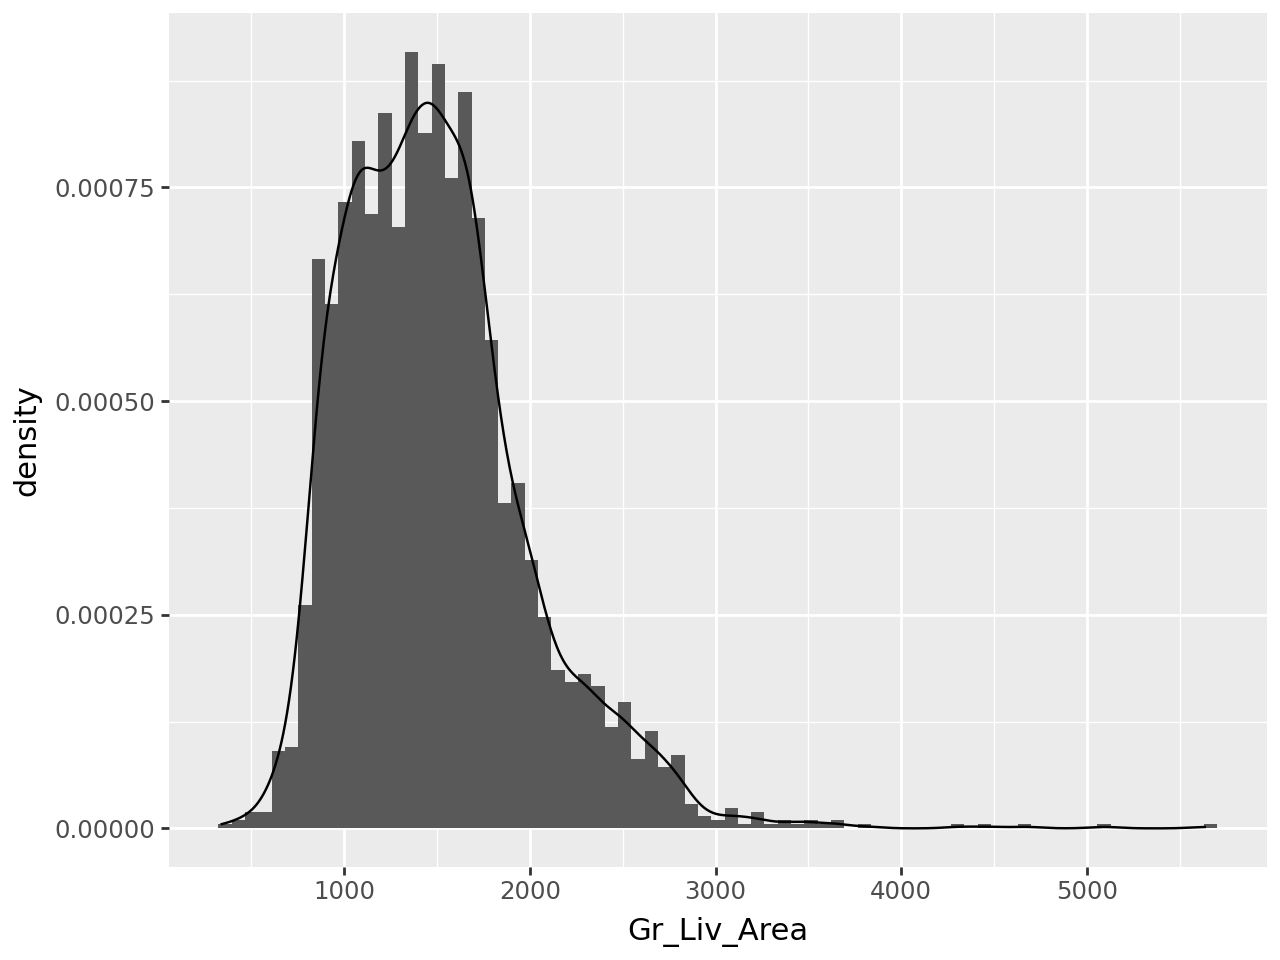

In [60]:
histogram_living_area = (ggplot(ames_housing, aes(x = 'Gr_Liv_Area'))+
                         geom_histogram(aes(y='..density..'), bins = 75) +
                         geom_density())

histogram_living_area.show()

### Question 2f
The distribution of the Gr Liv Area variable is:

Answer: Right skewed

## Question set 3

### Question 3a
Which of the following types of variables best describes the column Lot_Shape?

In [61]:
ames_housing['Lot_Shape'].value_counts()

Lot_Shape
Regular                 1859
Slightly_Irregular       979
Moderately_Irregular      76
Irregular                 16
Name: count, dtype: int64

Answer: Ordinal

### Question 3b
Which of the following types of variables best describes the column Overall_Qual?

In [62]:
ames_housing['Overall_Qual'].value_counts()

Overall_Qual
Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: count, dtype: int64

Answer: Ordinal

### Question 3c
Which of the following types of variables best describes the column Heating QC?

In [64]:
ames_housing['Heating_QC'].value_counts()

Heating_QC
Excellent    1495
Typical       864
Good          476
Fair           92
Poor            3
Name: count, dtype: int64

Answer: Ordinal

### Question 3d
Which of the following types of variables best describes the column Lot Area?

Answer: Ordinal